In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
import pickle

# Loading Data And Basic Preprocessing

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (60000, 28, 28)
y_train: (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


In [15]:
x_train = x_train / 255
x_test = x_test / 255

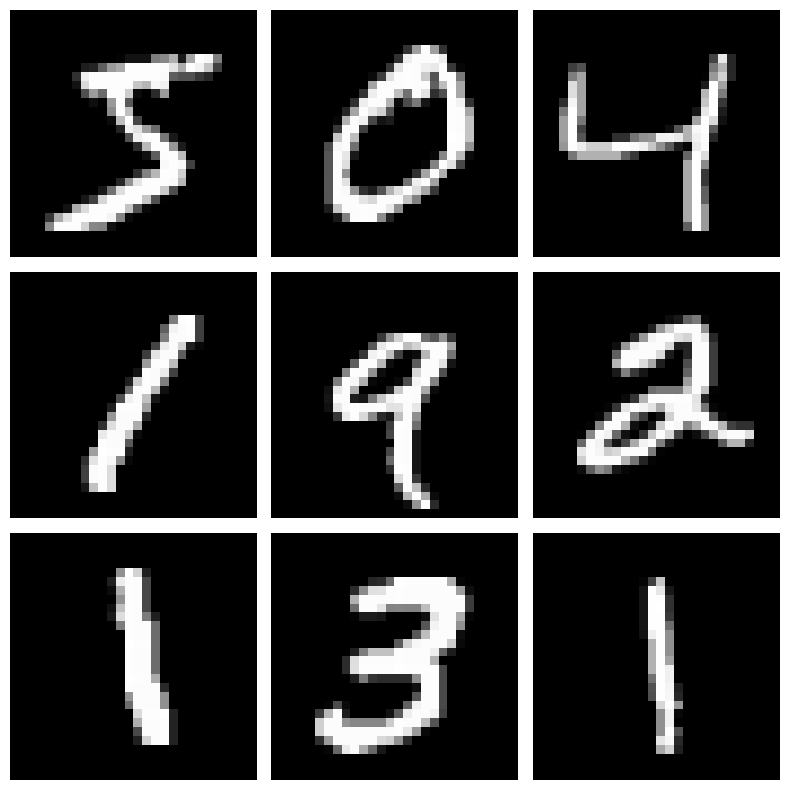

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    ax.axis('off')
plt.tight_layout()
plt.show()

# Training

## Simple Neural Network

In [5]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(units=128, activation="relu"),
    Dense(units=10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 2s 875us/step - loss: 0.2604 - accuracy: 0.9245 - val_loss: 0.1451 - val_accuracy: 0.9580
Epoch 2/30
1875/1875 [==============================] - 2s 817us/step - loss: 0.1165 - accuracy: 0.9660 - val_loss: 0.0999 - val_accuracy: 0.9697
Epoch 3/30
1875/1875 [==============================] - 2s 818us/step - loss: 0.0798 - accuracy: 0.9765 - val_loss: 0.0911 - val_accuracy: 0.9714
Epoch 4/30
1875/1875 [==============================] - 1s 790us/step - loss: 0.0594 - accuracy: 0.9819 - val_loss: 0.0802 - val_accuracy: 0.9755
Epoch 5/30
1875/1875 [==============================] - 1s 798us/step - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.0758 - val_accuracy: 0.9763
Epoch 6/30
1875/1875 [==============================] - 1s 784us/step - loss: 0.0365 - accuracy: 0.9889 - val_loss: 0.0757 - val_accuracy: 0.9779
Epoch 7/30
1875/1875 [==============================] - 1s 789us/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0851 -

In [99]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

313/313 [==============================] - 0s 667us/step - loss: 0.1318 - accuracy: 0.9801
Test Loss: 0.132
Test Accuracy: 0.980


In [98]:
model.save("models/simple_keras_nn")

INFO:tensorflow:Assets written to: models/simple_keras_nn/assets


INFO:tensorflow:Assets written to: models/simple_keras_nn/assets


## CNN

In [102]:
cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')])

# Compile the model
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 5, 5, 64)         

In [106]:
cnn.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 22s 47ms/step - loss: 0.3601 - accuracy: 0.8860 - val_loss: 0.0723 - val_accuracy: 0.9768
Epoch 2/10
469/469 [==============================] - 23s 49ms/step - loss: 0.1224 - accuracy: 0.9637 - val_loss: 0.0439 - val_accuracy: 0.9857
Epoch 3/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0908 - accuracy: 0.9726 - val_loss: 0.0358 - val_accuracy: 0.9878
Epoch 4/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0778 - accuracy: 0.9765 - val_loss: 0.0334 - val_accuracy: 0.9890
Epoch 5/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0662 - accuracy: 0.9792 - val_loss: 0.0287 - val_accuracy: 0.9900
Epoch 6/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0637 - accuracy: 0.9808 - val_loss: 0.0305 - val_accuracy: 0.9896
Epoch 7/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.0261 - val_accuracy:

In [107]:
loss, accuracy = cnn.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0258 - accuracy: 0.9912
Test Loss: 0.02578812837600708
Test Accuracy: 0.9911999702453613


In [108]:
cnn.save("models/cnn")

2023-06-29 16:07:50.563246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]
2023-06-29 16:07:50.573214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,5,5,64]
	 [[{{node inputs}}]]
2023-06-29 16:07:50.583486: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-06-

INFO:tensorflow:Assets written to: models/cnn/assets


INFO:tensorflow:Assets written to: models/cnn/assets


## From Scratch Neural Net

In [17]:
from mynet import NeuralNetwork

In [18]:
nn = NeuralNetwork([784, 30, 10])

In [19]:
x_train_flatten = x_train.reshape(60000, -1, 1)
x_test_flatten = x_test.reshape(10000, -1, 1)

In [20]:
y_train_hot = np.reshape(to_categorical(y_train), (60000, 10, 1))
print(y_test.shape)

(10000,)


In [21]:
nn_train_data = list(tuple(zip(x_train_flatten, y_train_hot)))
nn_test_data = list(tuple(zip(x_test_flatten, y_test)))

In [22]:
print(len(nn_train_data))
print(len(nn_train_data[0]))
print(nn_train_data[100][0].shape)
print(nn_train_data[100][1].shape)


60000
2
(784, 1)
(10, 1)


In [23]:
epochs = 10
eta = 3

nn.train(training_data=nn_train_data, epochs=epochs, eta=eta, test_data=nn_test_data)

Epoch 0 complete: 8754 / 10000
Epoch 1 complete: 9051 / 10000
Epoch 2 complete: 9174 / 10000
Epoch 3 complete: 9230 / 10000
Epoch 4 complete: 9267 / 10000
Epoch 5 complete: 9309 / 10000
Epoch 6 complete: 9365 / 10000
Epoch 7 complete: 9364 / 10000
Epoch 8 complete: 9388 / 10000
Epoch 9 complete: 9376 / 10000


In [27]:
weights = nn.weights
biases = nn.biases

# Save the weights
# with open('models/my_nn/weights.pkl', 'wb') as f:
#     pickle.dump(weights, f)

np.save('models/my_nn/weights.npy', weights)
np.save('models/my_nn/biases.npy', biases)


# # Save the biases
# with open('models/my_nn/biases.pkl', 'wb') as f:
#     pickle.dump(biases, f)